In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [2]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',index_col=0)
df.head(6)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m


In [3]:
df1=df.fillna(df.mean())
df1.head(6)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m


In [4]:
geno=df1['Genotype'].values

In [5]:
y=np.unique(geno,return_inverse=True)[1]
X=np.array(df1.iloc[:,:77])
Xs=preprocessing.scale(X)
print(Xs.shape)

(1080, 77)


In [6]:
logreg=linear_model.LogisticRegression(C=1e5)
logreg.fit(Xs,y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
yhat=logreg.predict(Xs)
acc=np.mean(yhat==y)
print("Accuracy on training data= %f" % acc)

Accuracy on training data= 1.000000


(0, 0.05)

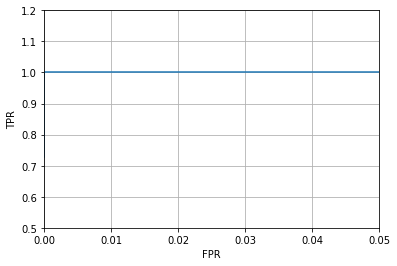

In [8]:
from sklearn import metrics
yprob = logreg.predict_proba(Xs)
fpr,tpr,thresholds = metrics.roc_curve(y,yprob[:,1])

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1.2])
plt.xlim([0,0.05])

In [9]:
auc=metrics.roc_auc_score(y,yprob[:,1])
print("AUC=%f" % auc)

AUC=1.000000


In [10]:
co=logreg.coef_
W=co[0,:]

<Container object of 3 artists>

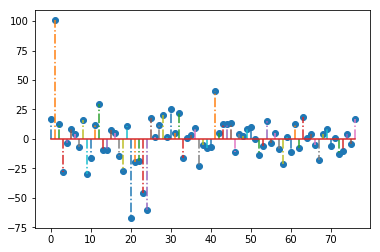

In [11]:
att=np.array(range(0,77))
plt.stem(att,W,'-.')

In [12]:
name=np.array(df.columns)
absw=abs(W)
top=np.argsort(-absw[:2])
print("Two largest W is") 
for i in top:
    value=absw[i]
    print("name=%s, value=%s"%(name[i],absw[i]))

Two largest W is
name=ITSN1_N, value=100.693363237
name=DYRK1A_N, value=16.7721357546


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support 
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
prec = []
rec = []
f1 = []
acc = []
for train, test in kf.split(Xs):
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y[train]
    Xts = Xs[test,:]
    yts = y[test]
# Fit a model
    logreg.fit(Xtr, ytr)
    yhat1= logreg.predict(Xts)
    # Measure performance
    preci,reci,f1i,_=precision_recall_fscore_support(yts,yhat1,average='binary')
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat1 == yts)
    acc.append(acci)
# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)
# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)
print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se)) 
print('Recall = {0:.4f}, SE={1:.4f}'.format(recm, rec_se)) 
print('f1 = {0:.4f}, SE={1:.4f}'.format(f1m, f1_se)) 
print('Error rate = {0:.4f}, SE={1:.4f}'.format(1-accm, acc_se))

Precision = 0.9458, SE=0.0145
Recall = 0.9631, SE=0.0076
f1 = 0.9535, SE=0.0072
Error rate = 0.0426, SE=0.0059


In [14]:
cl=df1['class'] 
y_cl=np.unique(cl,return_inverse=True)[1]
logreg1=linear_model.LogisticRegression(C=1,multi_class='ovr')
logreg1.fit(Xs,y_cl)
yhat2=logreg1.predict(Xs)
acc=np.mean(yhat2==y_cl)
print("Accuracy on training data= %f" % acc)

Accuracy on training data= 0.999074


In [15]:
from sklearn.metrics import confusion_matrix 
import sklearn.preprocessing 
logreg2=linear_model.LogisticRegression(C=1) 
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True) 
prec2 = []
rec2 = []
f12 = []
acc2 = []
for train, test in kf.split(Xs):
    # Get training and test data
    Xtr1 = Xs[train,:]
    ytr1 = y_cl[train]
    Xts1 = Xs[test,:]
    yts1= y_cl[test]
    # Fit a model
    logreg2.fit(Xtr1, ytr1)
    yhat3= logreg2.predict(Xts1)
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts1,yhat3)
    prec2.append(preci)
    rec2.append(reci)
    f12.append(f1i)
    acci2 = np.mean(yhat3 == yts1)
    acc2.append(acci2)
    C=confusion_matrix(yts1,yhat3) 
    C=C.astype('float')/C.sum(axis=1)[:,np.newaxis] 
    print(np.array_str(C, precision=4, suppress_small=True))
# Take average values of the metrics
precm2 = np.mean(prec2)
recm2 = np.mean(rec2)
f1m2 = np.mean(f12)
accm2= np.mean(acc2)
# Compute the standard errors
prec_se2 = np.std(prec2)/np.sqrt(nfold-1)
rec_se2 = np.std(rec2)/np.sqrt(nfold-1)
f1_se2 = np.std(f12)/np.sqrt(nfold-1)
acc_se2 = np.std(acc2)/np.sqrt(nfold-1)
print('Precision = {0:.4f}, SE={1:.4f}'.format(precm2,prec_se2))
print('Recall = {0:.4f}, SE={1:.4f}'.format(recm2, rec_se2)) 
print('f1 = {0:.4f}, SE={1:.4f}'.format(f1m2, f1_se2)) 
print('Error rate = {0:.4f}, SE={1:.4f}'.format(1-accm2, acc_se2))

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]
[[ 0.9524  0.0476  0.      0.      0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.    ]]
[[ 0.9545  0.0455  0.      0.      0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      1.      0.      0.      0.   

<Container object of 3 artists>

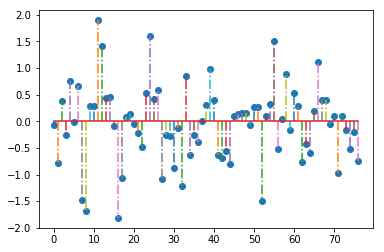

In [16]:
logreg3=linear_model.LogisticRegression(C=1)
logreg3.fit(Xs,y_cl)
co_multi=logreg3.coef_
w2=co_multi[0]
plt.stem(att,w2,'-.')

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
The minimum test error rate =   2.7778e-02, SE=  5.5212e-03
The C value corresponding to minimum error =   1.2743e+00


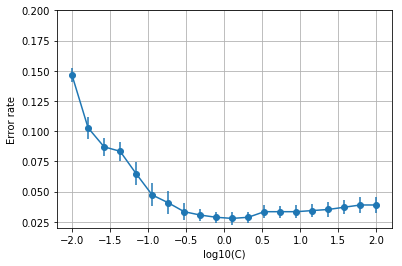

In [17]:
npen = 20
C_test = np.logspace(-2,2,npen)

# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))
# Create the logistic regression object
logreg = linear_model.LogisticRegression(penalty='l1',warm_start=True)

# Loop over the folds in the cross-validation
for ifold, Ind in enumerate(kf.split(Xs)):        
            
    # Get training and test data
    Itr, Its = Ind
    Xtr = Xs[Itr,:]
    ytr = y[Itr]
    Xts = Xs[Its,:]
    yts = y[Its]
    
    # Loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Xtr, ytr)
    
        # Predict the labels on the test set.
        yhat = logreg.predict(Xts)
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)
    print("Fold %d" % ifold)
    
err_mean = np.mean(err_rate, axis=1)
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.02,0.2])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))


In [18]:
err_tgt = err_mean[imin] + err_se[imin]
iopt = np.where(err_mean < err_tgt)[0][0]
C_opt = C_test[iopt]

print("Optimal C=%12.4e" % C_opt)
print("The test error rate = %12.4e, SE=%12.4e" % (err_mean[iopt], err_se[iopt]))

print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(1-err_mean[iopt], err_se[iopt]))

Optimal C=  4.8329e-01
The test error rate =   3.0556e-02, SE=  5.1738e-03
Accuracy =  0.9694, SE=0.0052


The number of non-zero coefficients for the optimal C = 45.000000


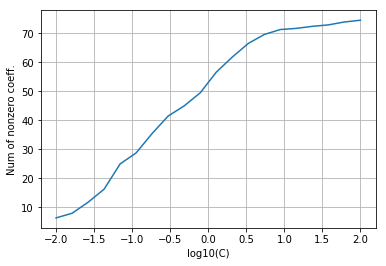

In [19]:
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
plt.plot(np.log10(C_test),num_nonzerocoef_mean)

plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Num of nonzero coeff.')

print("The number of non-zero coefficients for the optimal C = %f" % num_nonzerocoef_mean[iopt])

Accuracy on the training data is 0.981481


Text(0.5,1,'l1-regularization')

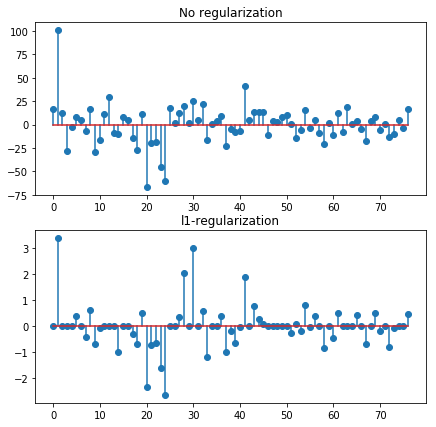

In [20]:
logreg = linear_model.LogisticRegression(C=C_opt,penalty='l1')
logreg.C= C_opt
logreg.fit(Xs,y)
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print('Accuracy on the training data is {0:f}'.format(acc))
W_l1 = logreg.coef_

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(W)
plt.title('No regularization')
plt.subplot(2,1,2)
plt.stem(W_l1[0,:])
plt.title('l1-regularization')

In [114]:
#The accuracy for the training data without regularization was 0.9694.
#So with regularization, we were able to improve the accuracy slightly. 